# A Cando-app to setup free energy perturbation calculations using AMBER

First we do the following:

  * Load the FEP package.
  * Set things up to carry out geometry optimization using Amber.

In [47]:
(ql:quickload :fep)

To load "fep":
  Load 1 ASDF system:
    fep

; Loading "fep"



(:FEP)

In [48]:
(leap:setup-amber-paths)

(#P"/Users/meister/Dropbox/amber18/dat/antechamber/"
 #P"/Users/meister/Dropbox/amber18/dat/leap/cmd/"
 #P"/Users/meister/Dropbox/amber18/dat/leap/parm/"
 #P"/Users/meister/Dropbox/amber18/dat/leap/lib/"
 #P"/Users/meister/Dropbox/amber18/dat/leap/prep/")

In [49]:
(source "leaprc.protein.ff14SB")

Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



T

# Start a new FEP calculation

In [50]:
(defparameter *feps* (make-instance 'fep:calculation))

*FEPS*

# Import the sketch from a Chemdraw file

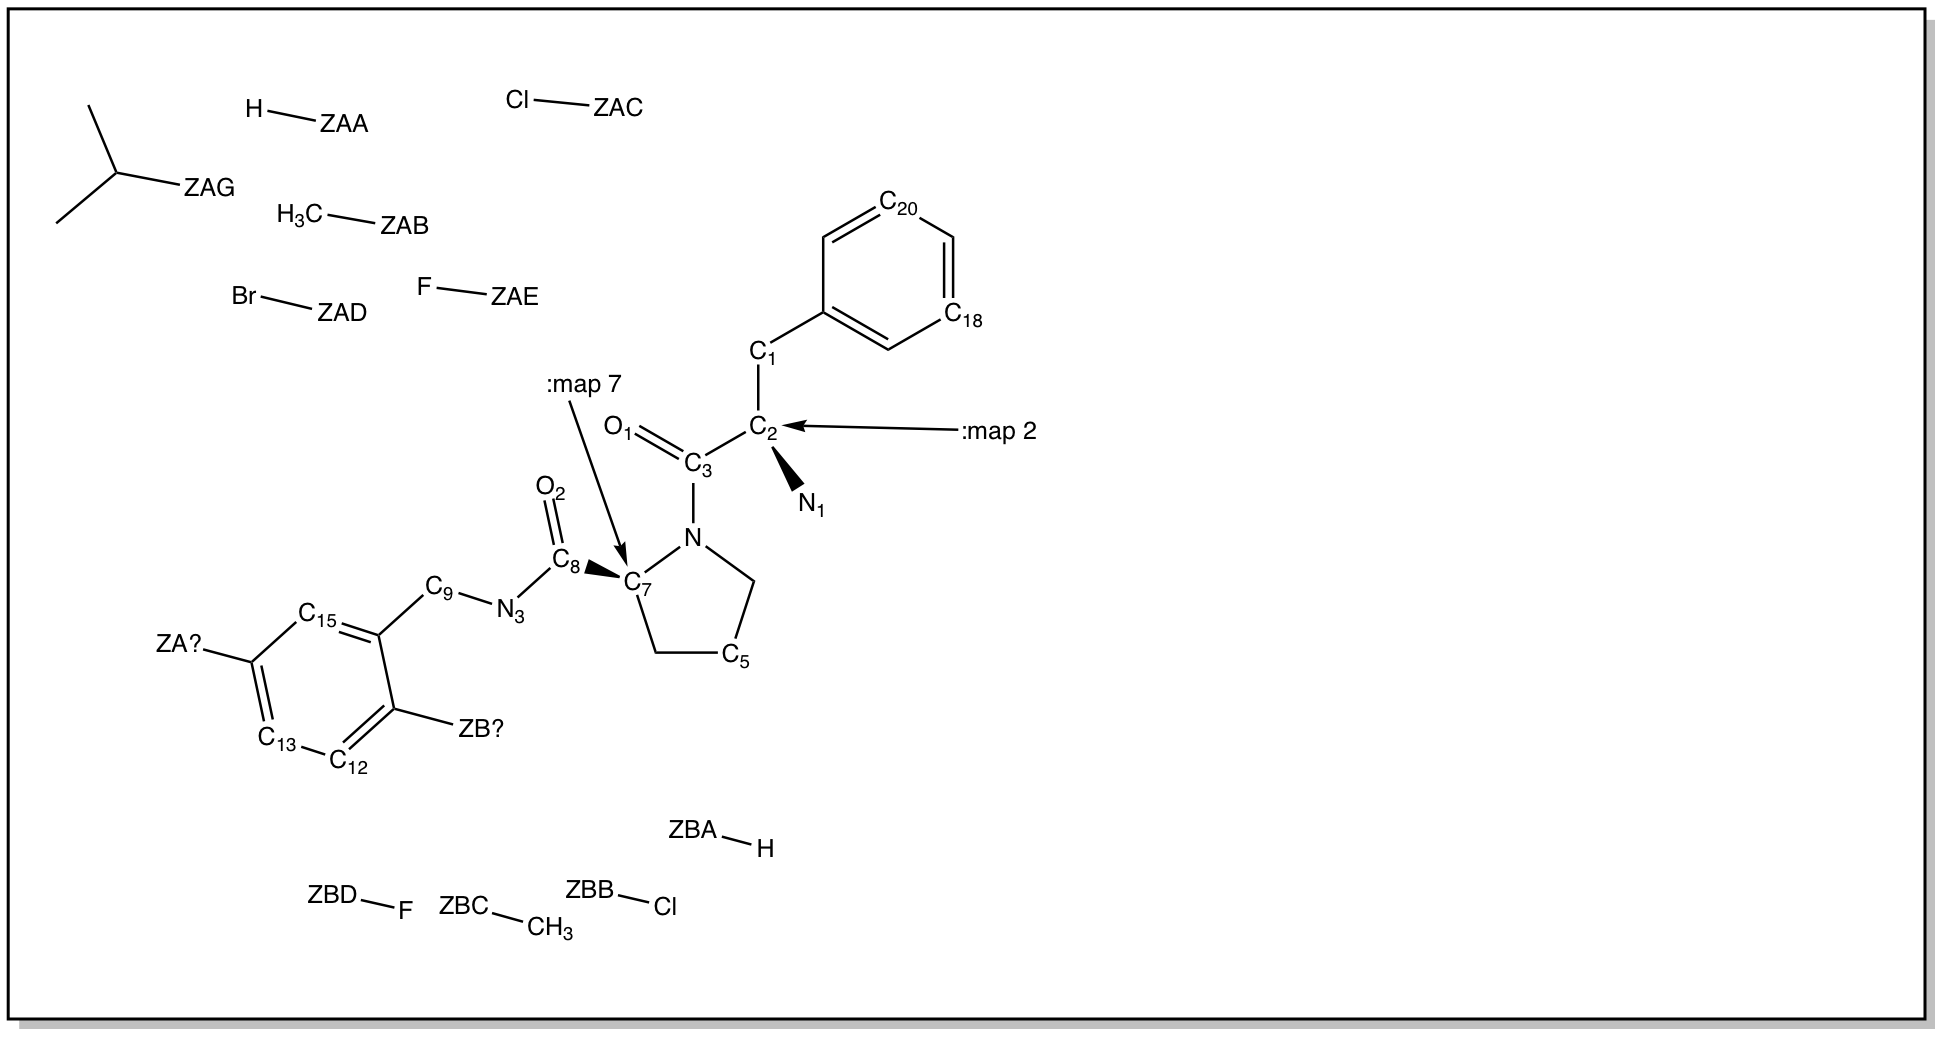

In [51]:
(png-from-file "ligand2.png" )

In [52]:
(defparameter *sketch* (fep:load-chem-draw-fep "ligand2.cdxml"))

*SKETCH*

In [53]:
(fep:setup-ligands *feps* *sketch*)

Average bond length: 30.19461705498824d0
In build-topologys core-group: (#<ATOM :C_17/:C @0x12bfd4789> #<ATOM :C20/:C @0x12bfd4879>
 #<ATOM :C_12/:C @0x12bfd4c39> #<ATOM :C_15/:C @0x12bfd4969>
 #<ATOM :C1/:C @0x12bfd4d29> #<ATOM :C_13/:C @0x12bfd4b49>
 #<ATOM :C18/:C @0x12bfd4a59> #<ATOM :C2/:C @0x131e64009>
 #<ATOM :C3/:C @0x131e640f9> #<ATOM :N1/:N @0x12bfd4e19>
 #<ATOM :N/:N @0x131e643c9> #<ATOM :O1/:O @0x12bfd4f09>
 #<ATOM :C_3/:C @0x131e644b9> #<ATOM :C7/:C @0x131e642d9>
 #<ATOM :C5/:C @0x131e645a9> #<ATOM :C_6/:C @0x131e641e9>
 #<ATOM :C8/:C @0x12bfd4699> #<ATOM :O2/:O @0x12bfd45a9>
 #<ATOM :N3/:N @0x12bfd44b9> #<ATOM :C9/:C @0x12bfd43c9>
 #<ATOM :C_22/:C @0x12bfd42d9> #<ATOM :C_27/:C @0x12bfdfe19>
 #<ATOM :C15/:C @0x12bfd41e9> #<ATOM :C12/:C @0x12bfdff09>
 #<ATOM :ZB?/:NE @0x12bfdfd29> #<ATOM :C_24/:C @0x12bfd40f9>
 #<ATOM :C13/:C @0x12bfd4009> #<ATOM :ZA?/:NE @0x12bfdfc39>)
side-chain-groups: #<HASH-TABLE-EQL :HashTableCount 10 :calculated-entries 10 :size 16 @0x128cea148>
map-

(#<FEP-STRUCTURE AGBC> #<FEP-STRUCTURE AEBC> #<FEP-STRUCTURE ABBC>
 #<FEP-STRUCTURE AABC> #<FEP-STRUCTURE ACBC> #<FEP-STRUCTURE ADBC>
 #<FEP-STRUCTURE AGBD> #<FEP-STRUCTURE AEBD> #<FEP-STRUCTURE ABBD>
 #<FEP-STRUCTURE AABD> #<FEP-STRUCTURE ACBD> #<FEP-STRUCTURE ADBD>
 #<FEP-STRUCTURE AGBA> #<FEP-STRUCTURE AEBA> #<FEP-STRUCTURE ABBA>
 #<FEP-STRUCTURE AABA> #<FEP-STRUCTURE ACBA> #<FEP-STRUCTURE ADBA>
 #<FEP-STRUCTURE AGBB> #<FEP-STRUCTURE AEBB> #<FEP-STRUCTURE ABBB>
 #<FEP-STRUCTURE AABB> #<FEP-STRUCTURE ACBB> #<FEP-STRUCTURE ADBB>)

In [82]:
(defparameter v (show (fep:layout-ligands *feps*)))
v

#<NGLV:NGLWIDGET>

# Load the Thrombin PDB file

In [55]:
(start-swank)

Swank is already running


NIL

In [56]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando-dev/extensions/cando/src/examples/thrombin-fep/"

In [57]:
(defparameter *thrombin* (load-pdb "/Users/meister/Development/cando-dev/extensions/cando/src/examples/thrombin-fep/2zff_fixed.pdb"))

:ssbond for (SSBOND L 1 H 122)
:ssbond for (SSBOND H 42 H 58)
:ssbond for (SSBOND H 168 H 182)
:ssbond for (SSBOND H 191 H 220)

Creating molecule with name: L
Creating molecule with name: H
Creating molecule with name: I

Merging the molecules #<MOLECULE :H> #<MOLECULE :L>



Could not immediately identify topology for (53U . MAIN)

Could not identify topology for (53U . MAIN)

Could not immediately identify topology for (53U . TAIL)

Could not identify topology for (53U . TAIL)

Loaded atom (2371 O1 TYR I 63 NIL) but amber form #<TOPOLOGY  :name TYR @0x137c182d8> does not recognize it

Loaded atom (2372 O2 TYR I 63 NIL) but amber form #<TOPOLOGY  :name TYR @0x137c182d8> does not recognize it

Loaded atom (2373 O3 TYR I 63 NIL) but amber form #<TOPOLOGY  :name TYR @0x137c182d8> does not recognize it

There are 8 unbuilt heavy atoms - not building hydrogens


*THROMBIN*

In [58]:
(build-unbuilt-hydrogens *thrombin*)

Hydrogens built   0.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x1380324b9> #<ATOM :CB/:C @0x138032a59>
 #<ATOM :N/:N @0x138032e19>)
Building from sorted-built: (#<ATOM :C/:C @0x1380691e9> #<ATOM :CB/:C @0x138069f09>
 #<ATOM :N/:N @0x1380322d9>)
Building from sorted-built: (#<ATOM :C/:C @0x13809a3c9> #<ATOM :CB/:C @0x13809ac39>
 #<ATOM :N/:N @0x138069009>)
Hydrogens built   1.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x1380c25a9> #<ATOM :CB/:C @0x1380c2e19>
 #<ATOM :N/:N @0x13809a1e9>)
Building from sorted-built: (#<ATOM :C/:C @0x1380ea3c9> #<ATOM :CB/:C @0x1380c2009>
 #<ATOM :N/:N @0x1380c23c9>)
Building from sorted-built: (#<ATOM :CA/:C @0x1380c21e9> #<ATOM :CG1/:C @0x1380eaa59>
 #<ATOM :CG2/:C @0x1380eae19>)
Hydrogens built   2.0% elapsed: -- ETC: --   Building from sorted-built: (#<ATOM :C/:C @0x13810f699> #<ATOM :CB/:C @0x13810fb49>
 #<ATOM :N/:N @0x1380ea1e9>)
Building from sorted-built: (#<ATOM :C/:C @0x13812f879> #<ATOM :CB/:C 

2293

In [59]:
(defparameter vthrombin (show *thrombin*))
;;;(nglv::add-representation vthrombin "surface" :selection "protein")
vthrombin

#<NGLV:NGLWIDGET>

In [60]:
(nglv::add-representation vthrombin "ball+stick" :selection "all")

T

In [61]:
(remove-molecules *thrombin* 'solvent)

NIL

In [62]:
(chem:setf-molecule-type (chem:content-with-name *thrombin* :|53U|) 'ligand)

LIGAND

In [63]:
(push *thrombin* (fep:receptors *feps*))

(#<AGGREGATE 2zff_fixed>)

# Load a template ligand

In [64]:
(defparameter *lig* (load-pdb "/Users/meister/Development/cando-dev/extensions/cando/src/examples/thrombin-fep/ligand.pdb"))


Creating molecule with name: H


Built 0 missing hydrogens



Could not immediately identify topology for (53U . HEAD)

Could not identify topology for (53U . HEAD)

Could not immediately identify topology for (53U . TAIL)

Could not identify topology for (53U . TAIL)


*LIG*

In [65]:
(show *lig*)

#<NGLV:NGLWIDGET>

In [66]:
(defmacro named-test (name)
    `(cons ,name (lambda (a) (eq (chem:get-name a) ,name))))

NAMED-TEST

Define a SMARTS matcher that labels ligand atoms

In [67]:
(defparameter *tests* (mapcar (lambda (name) (named-test name)) '(:c13 :c12 :c15 :c9 :c8 :c7 :c5 :c3 :c1 :c20 :c18 :n1 :n3 :o2 :o1 :c2)))
(defparameter *pick* (chem:compile-smarts 
             "[C<c13>:13]1~[C<c12>:12]~C~C(~[C<c15>:15]~C1)~[C<c9>:9]~[N<n3>:33]~[C<c8>:8](~[O<o2>:22])[C<c7>:7]7C[C<c5>:5]CN7[C<c3>:3](~[O<o1>:21])[C<c2>:2]([N<n1>:31])[C<c1>:1]C10~C~[C<c20>:20]~C~[C<c18>:18]~C10" :tests *tests*))


*PICK*

Test the SMARTS code against the atoms of the ligand - it should recognize atom C13

In [68]:
(cando:do-atoms (a *lig*) (when (chem:matches *pick* a)
                              (format t "Match!! ~a -> ~a~%" a (chem:matches *pick* a))))

Match!! #<ATOM :C13/:C @0x12caff1e9> -> ( CHEM-INFO-MATCH :TagLookup '(:tag 1 :value #<ATOM :C1/:C @0x132e2e0f9> ) :tag 2 :value #<ATOM :C2/:C @0x132e2e3c9> ) :tag 3 :value #<ATOM :C3/:C @0x132e2e2d9> ) :tag 5 :value #<ATOM :C5/:C @0x12caff879> ) :tag 7 :value #<ATOM :C7/:C @0x12caffc39> ) :tag 8 :value #<ATOM :C8/:C @0x12caffb49> ) :tag 9 :value #<ATOM :C9/:C @0x12caff5a9> ) :tag 12 :value #<ATOM :C12/:C @0x12caff2d9> ) :tag 13 :value #<ATOM :C13/:C @0x12caff1e9> ) :tag 15 :value #<ATOM :C15/:C @0x12caff009> ) :tag 18 :value #<ATOM :C18/:C @0x12037f0f9> ) :tag 20 :value #<ATOM :C20/:C @0x12cafff09> ) :tag 21 :value #<ATOM :O1/:O @0x132e2e1e9> ) :tag 22 :value #<ATOM :O2/:O @0x12caffa59> ) :tag 31 :value #<ATOM :N1/:N @0x132e2e4b9> ) :tag 33 :value #<ATOM :N3/:N @0x12caff699> )  ))


NIL

# Use the GAFF force field to build chemically reasonable structures of candidate ligands

In [69]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")
(load-amber-params "gaff.dat")

Adding force field gaff.dat to DEFAULT



Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



#<FORCE-FIELD gaff.dat>

In [70]:
(fep:build-ligands *feps*)

Building AGBC
build-structures fep: #<FEP-STRUCTURE AGBC>   map-atoms: ((2 . #<ATOM :C2/:C @0x12b368e19>) (7 . #<ATOM :C7/:C @0x12b368879>))
Building AEBC
build-structures fep: #<FEP-STRUCTURE AEBC>   map-atoms: ((2 . #<ATOM :C2/:C @0x12b37e2d9>) (7 . #<ATOM :C7/:C @0x128787d29>))
Building ABBC
build-structures fep: #<FEP-STRUCTURE ABBC>   map-atoms: ((2 . #<ATOM :C2/:C @0x1287df009>) (7 . #<ATOM :C7/:C @0x123204a59>))
Building AABC
build-structures fep: #<FEP-STRUCTURE AABC>   map-atoms: ((2 . #<ATOM :C2/:C @0x11f873a59>) (7 . #<ATOM :C7/:C @0x11f8734b9>))
Building ACBC
build-structures fep: #<FEP-STRUCTURE ACBC>   map-atoms: ((2 . #<ATOM :C2/:C @0x11f913789>) (7 . #<ATOM :C7/:C @0x11f9131e9>))
Building ADBC
build-structures fep: #<FEP-STRUCTURE ADBC>   map-atoms: ((2 . #<ATOM :C2/:C @0x11803e4b9>) (7 . #<ATOM :C7/:C @0x132021f09>))
Building AGBD
build-structures fep: #<FEP-STRUCTURE AGBD>   map-atoms: ((2 . #<ATOM :C2/:C @0x12b0bb699>) (7 . #<ATOM :C7/:C @0x1298c0a59>))
Building AEBD

NIL

In [71]:
(show (fep:layout-ligands *feps* :accessor 'fep::molecule))

#<NGLV:NGLWIDGET>

# Pose the new ligands onto the template ligand

In [72]:
(fep:pose-ligands-using-pattern *feps* *pick* *lig* :stereochemical-restraints '( (2 . :R) (7 . :S)))

fep #<FEP-STRUCTURE AGBC>
 moveable-atoms -> #<FEP-STRUCTURE AGBC>
    fixed-atoms -> (#<ATOM :N3/:N @0x12caff699> #<ATOM :O2/:O @0x12caffa59>
 #<ATOM :C20/:C @0x12cafff09> #<ATOM :C3/:C @0x132e2e2d9>
 #<ATOM :C15/:C @0x12caff009> #<ATOM :C9/:C @0x12caff5a9>
 #<ATOM :C8/:C @0x12caffb49> #<ATOM :C1/:C @0x132e2e0f9>
 #<ATOM :C2/:C @0x132e2e3c9> #<ATOM :N1/:N @0x132e2e4b9>
 #<ATOM :C13/:C @0x12caff1e9> #<ATOM :C7/:C @0x12caffc39>
 #<ATOM :C18/:C @0x12037f0f9> #<ATOM :C5/:C @0x12caff879>
 #<ATOM :C12/:C @0x12caff2d9> #<ATOM :O1/:O @0x132e2e1e9>)
Anchored #<ATOM :N3/:N @0x12b3683c9> to '( 15.971 -10.576 20.754) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :O2/:O @0x12b3684b9> to '( 16.215 -12.728 19.926) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C20/:C @0x12b3523c9> to '( 21.101 -12.741 25.697) restraints: (#<RESTRAINT-ANCHOR >) props: (:CHEMDRAW-COLOR 3)
Anchored #<ATOM :C3/:C @0x12b368d29> to '( 17.436 -13.631 22.568) r

NIL

In [73]:
(defparameter vthrombin (show *thrombin*))
;;;(nglv::add-representation vthrombin "surface" :selection "protein")
vthrombin

#<NGLV:NGLWIDGET>

In [74]:
(defparameter *moveable-agg* (chem:make-aggregate))
(chem:add-matter *moveable-agg* (fep::molecule (first (fep:ligands *feps*))))
(defparameter *struct* (make-instance 'cando-structure :matter *moveable-agg*))
(nglv::add-structure vthrombin *struct*)

#<CANDO-JUPYTER:CANDO-STRUCTURE>

In [75]:
(fep:molecule (first (fep:ligands *feps*)))

#<MOLECULE :AGBC>

In [76]:
(show (fep:layout-ligands *feps* :accessor 'fep::molecule))

#<NGLV:NGLWIDGET>

# Define the pairs of compounds between which we want to carry out free energy perturbation calculations

In [77]:
(start-swank)

Swank is already running


NIL

In [78]:
(fep::build-initial-jobs *feps* :connections 2 :stages 3 :windows 3)

Morph from source: #<FEP-STRUCTURE ABBC> to target: #<FEP-STRUCTURE AEBC>
Morph from source: #<FEP-STRUCTURE AABC> to target: #<FEP-STRUCTURE ABBC>
Morph from source: #<FEP-STRUCTURE AABC> to target: #<FEP-STRUCTURE AEBC>
Morph from source: #<FEP-STRUCTURE AABC> to target: #<FEP-STRUCTURE ACBC>
Morph from source: #<FEP-STRUCTURE ABBC> to target: #<FEP-STRUCTURE ACBC>
Morph from source: #<FEP-STRUCTURE ACBC> to target: #<FEP-STRUCTURE ADBC>
Morph from source: #<FEP-STRUCTURE AABC> to target: #<FEP-STRUCTURE ADBC>
Morph from source: #<FEP-STRUCTURE ADBC> to target: #<FEP-STRUCTURE AEBD>
Morph from source: #<FEP-STRUCTURE ACBC> to target: #<FEP-STRUCTURE AEBD>
Morph from source: #<FEP-STRUCTURE ABBD> to target: #<FEP-STRUCTURE AEBD>
Morph from source: #<FEP-STRUCTURE ABBD> to target: #<FEP-STRUCTURE ADBC>
Morph from source: #<FEP-STRUCTURE AABD> to target: #<FEP-STRUCTURE ABBD>
Morph from source: #<FEP-STRUCTURE AABD> to target: #<FEP-STRUCTURE AEBD>
Morph from source: #<FEP-STRUCTURE AAB

#<JOB-GRAPH>

In [79]:
(fep:jobs *feps*)

#<JOB-GRAPH>

In [80]:
(graph::save-graph *feps*)

#<feps>

In [81]:
*default-pathname-defaults*

#P"/Users/meister/Development/cando-dev/extensions/cando/src/examples/thrombin-fep/"